In [2]:
import pandas as pd
from alpaca.constants import mK, mB, hbarc_GeVnm, mpi0
from alpaca.common import kallen
from alpaca.experimental_data.measurements_exp import babar_btoksnunu_lightmediator, belleII_bptoknunu_lightmediator
from alpaca.models.model_library import QED_DFSZ, beta, u_DFSZ, d_DFSZ, Q_KSVZ
from alpaca.statistics.chisquared import chi2_obs, combine_chi2
from alpaca.statistics.functions import nsigmas
import numpy as np
from alpaca.decays.alp_decays.branching_ratios import total_decay_width
import matplotlib.pyplot as plt
from alpaca.statistics.chisquared import get_chi2, combine_chi2
from alpaca.plotting.mpl import exclusionplot as mpl_plot
from alpaca.plotting.bokeh import exclusionplot
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern Roman']})

In [3]:
ma = np.logspace(-1,np.log10(mB-mK),100)
gammabeta_BelleII = 0.28
gamma_BelleII = np.sqrt(1+ gammabeta_BelleII**2)
rmin = 0.1 #cm
rmax = 100 #cm
def gammabeta_alp(ma, theta=1):
    theta *= np.pi
    Ea0 =  (mB**2+ma**2-mK**2)/2/mB
    pa0 = np.sqrt(kallen(mB**2, mK**2, ma**2))/2/mB
    pax = gammabeta_BelleII * Ea0 + gamma_BelleII * pa0 * np.cos(theta)
    pay = pa0 * np.sin(theta)
    return np.sqrt(pax**2+pay**2)/ma

In [4]:
coup = [Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, fa).match_run(5.5, integrator='leadinglog', basis='kF_below', matching_scale=80) for fa in np.logspace(2.0001, 6, 50)]
x_ma, y_coup = np.meshgrid(ma, coup)
x_ma, y_fa = np.meshgrid(ma, np.logspace(2.0001, 6, 50))
dw = np.vectorize(lambda ma, couplings, fa: total_decay_width(ma, couplings, fa, integrator='no_rge')['DW_tot'])
z_ctau = 1e-7*hbarc_GeVnm/dw(x_ma, y_coup, y_fa)
x_ma, y_fainv = np.meshgrid(ma, 1/np.logspace(2.0001, 6, 50))
prob_prompt = 1-np.exp(-rmin/(z_ctau*gammabeta_alp(x_ma)))
prob_displ = np.exp(-rmin/(z_ctau*gammabeta_alp(x_ma))) - np.exp(-rmax/(z_ctau*gammabeta_alp(x_ma)))
prob_inv = np.exp(-rmax/(z_ctau*gammabeta_alp(x_ma)))

Text(0.5, 1.0, '$B\\to Ka$ at Babar, Q-KSVZ ')

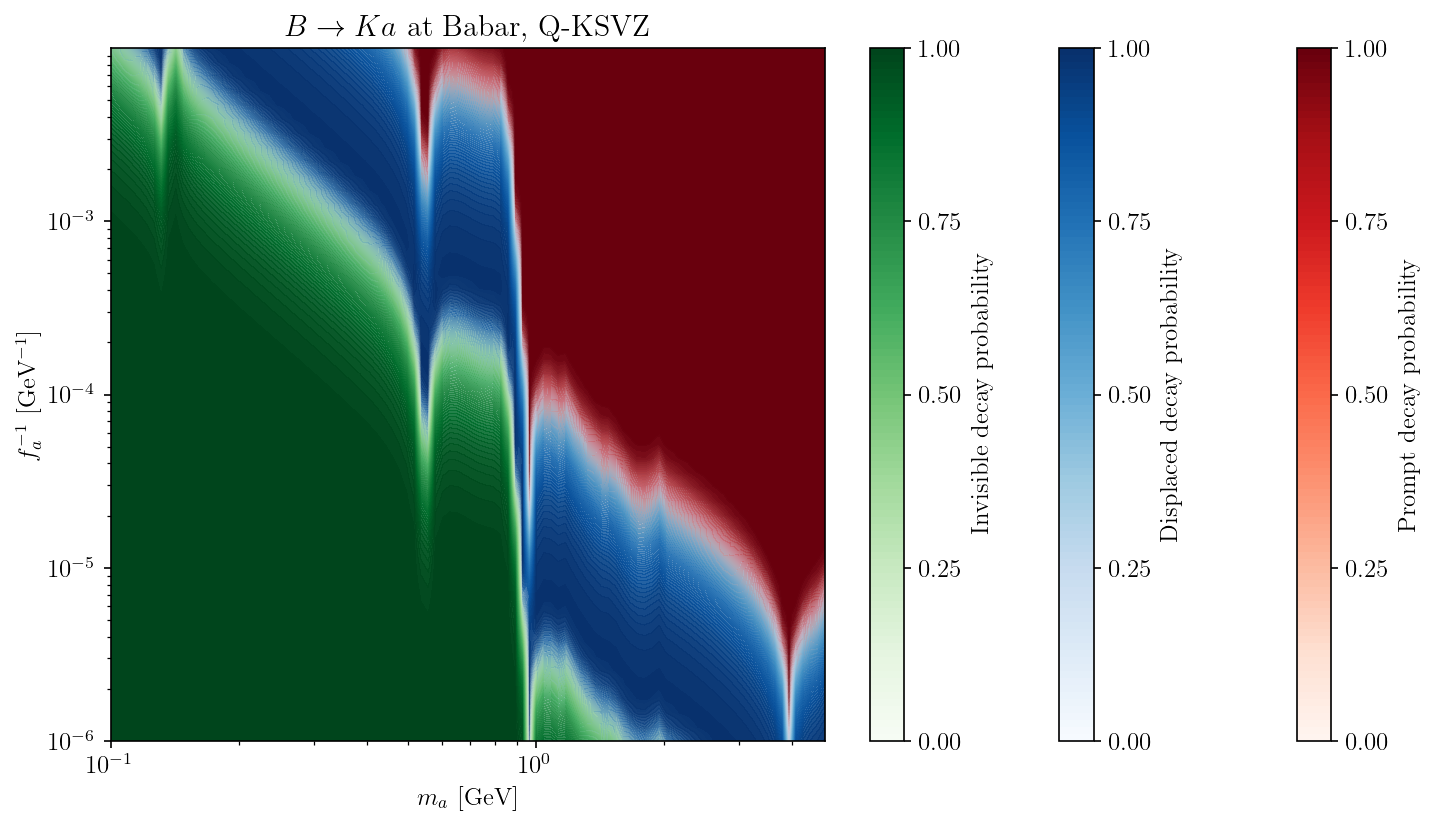

In [5]:
plt.figure(figsize=(12,6), dpi=150)
p1=plt.contourf(x_ma, y_fainv, prob_prompt, levels=np.linspace(0, 1, 100), cmap='Reds', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
p2=plt.contourf(x_ma, y_fainv, prob_displ, levels=np.linspace(0, 1, 100), cmap='Blues', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
p3=plt.contourf(x_ma, y_fainv, prob_inv, levels=np.linspace(0, 1, 100), cmap='Greens', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar1 = plt.colorbar(p1)
cbar1.set_ticks(np.linspace(0, 1, 5))
cbar1.set_label('Prompt decay probability')
cbar2 = plt.colorbar(p2)
cbar2.set_ticks(np.linspace(0, 1, 5))
cbar2.set_label('Displaced decay probability')
cbar3 = plt.colorbar(p3)
cbar3.set_ticks(np.linspace(0, 1, 5))
cbar3.set_label('Invisible decay probability')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B\to Ka$ at Babar, Q-KSVZ ')

In [6]:
ma = np.logspace(-1,np.log10(mB-mK),100)
coup1 = [Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, 200).match_run(5.5, integrator='scipy', basis='VA_below', matching_scale=80)]
dw = np.vectorize(lambda ma, couplings, fa: total_decay_width(ma, couplings, fa, integrator='no_rge')['DW_tot'])
z_ctau = 1e-7*hbarc_GeVnm/dw(ma, coup1, 200)

coup2 = [Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, 1000).match_run(5.5, integrator='scipy', basis='VA_below', matching_scale=80)]
dw1e3 = np.vectorize(lambda ma, couplings, fa: total_decay_width(ma, couplings, fa, integrator='no_rge')['DW_tot'])
z_ctau1e3 = 1e-7*hbarc_GeVnm/dw(ma, coup2, 1000)


/opt/anaconda3/lib/python3.12/site-packages/alpaca/rge/classes.py:233: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[45]), "cB": float(array[46]), 'cW': float(array[47])}
/opt/anaconda3/lib/python3.12/site-packages/alpaca/rge/classes.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}


Text(0.5, 1.0, '$B\\to Ka$ at Babar, Q-KSVZ ')

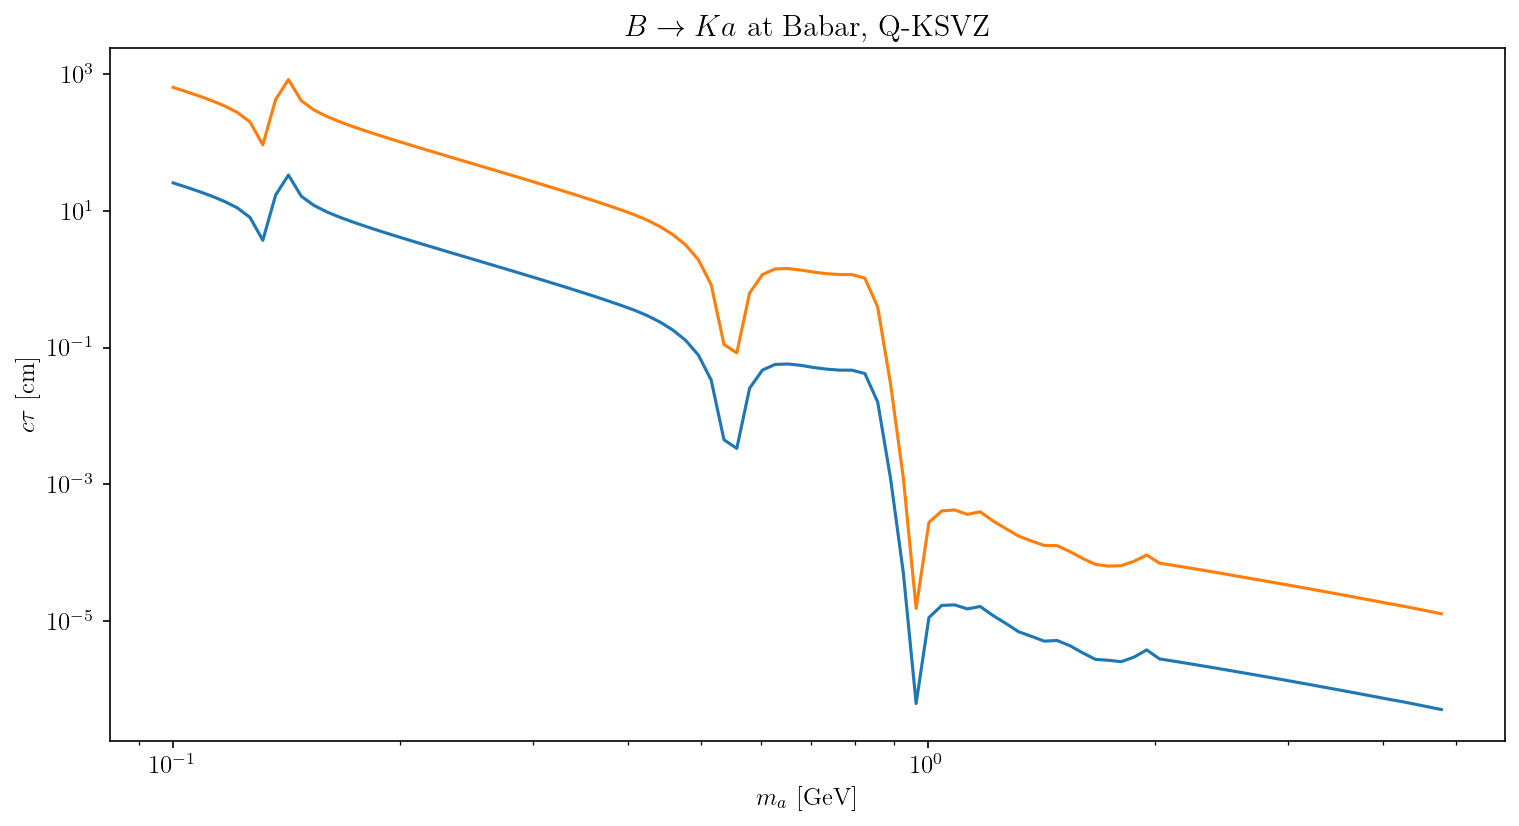

In [7]:
plt.figure(figsize=(12,6), dpi=150)
plt.plot(ma, z_ctau, label=r'$r_{\text{min}}=0.1$ cm, $r_{\text{max}}=0.1$ cm')
plt.plot(ma, z_ctau1e3, label=r'$r_{\text{min}}=0.1$ cm, $r_{\text{max}}=0.1$ cm')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c\tau$ [cm]')
plt.title(r'$B\to Ka$ at Babar, Q-KSVZ ')

In [8]:
ma = np.logspace(-1, np.log10(3), 20)
fa = np.logspace(2.0001, 7, 20)

couplings = [Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, 4*np.pi*f).match_run(5.5, 'VA_below', 'leadinglog') for f in fa]
x_ma, y_couplings = np.meshgrid(ma, couplings)
x_ma, y_fa = np.meshgrid(ma, fa)

In [9]:
transitions = [
    'B+ -> K+ a',
    'B0 -> K*0 a',
    'B+ -> K+ e e',
    'B0 -> K*0 e e',
    'B+ -> K+ mu mu',
    'B0 -> K*0 mu mu',
    'B+ -> K+ gamma gamma',
    'B+ -> K+ tau tau',
    'B0 -> K*0 tau tau',
    'Y(3S) -> gamma tau tau',
    'K+ -> pi+ a',
    'KL -> pi0 a'
]
chi2 = get_chi2(transitions, x_ma, y_couplings, y_fa, br_dark = 0.0, integrator='scipy', min_probability=1e-5)



/opt/anaconda3/lib/python3.12/site-packages/alpaca/rge/classes.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}


/var/folders/d6/3slwsgbn0nxcb5gx6gqqrsym0000gn/T/ipykernel_34214/2857622990.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


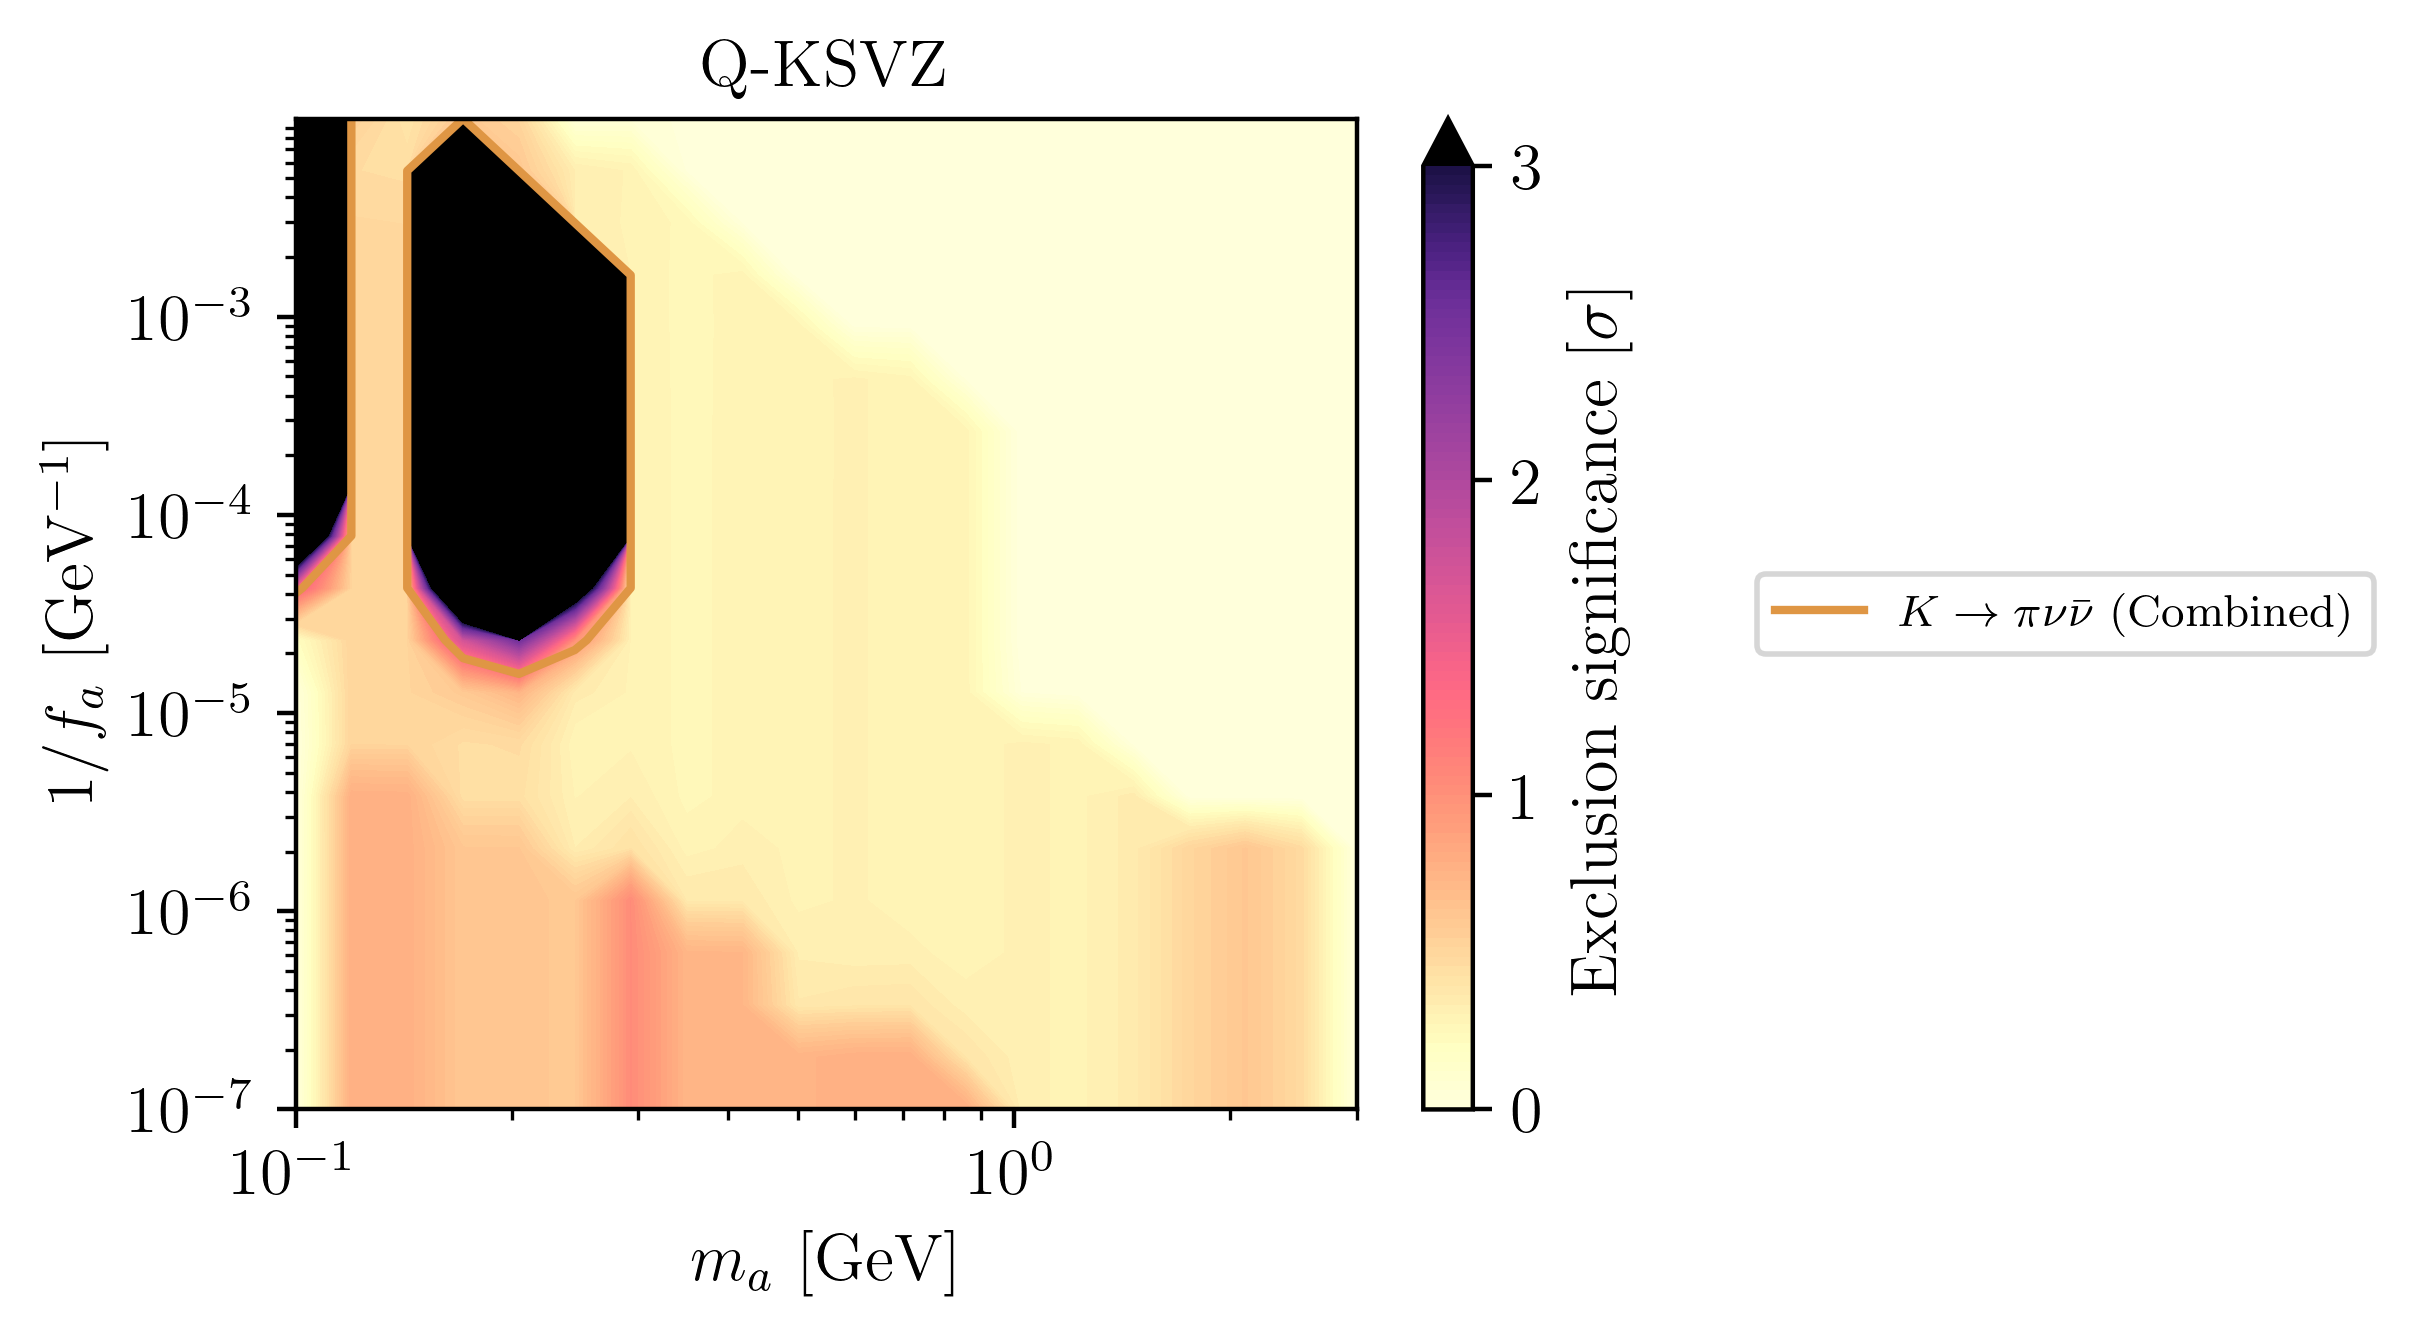

In [10]:
chi2_summary ={
    ('B -> K nu nu', 'Combined'): combine_chi2(chi2[('B+ -> K+ a', 'Belle II')], chi2[('B0 -> K*0 a', 'BaBar')]),
    ('B -> K e e', 'Combined'): combine_chi2(chi2[('B+ -> K+ e e', 'Belle II')], chi2[('B0 -> K*0 e e', 'Belle II')]),
    ('B -> K mu mu', 'Combined'): combine_chi2(chi2[('B+ -> K+ mu mu', 'Belle II')], chi2[('B0 -> K*0 mu mu', 'Belle II')], chi2[('B+ -> K+ mu mu', 'LHCb')], chi2[('B+ -> K+ mu mu', 'CHARM')], chi2[('B0 -> K*0 mu mu', 'LHCb')]),
    ('B+ -> K+ tau tau', 'BaBar'): chi2[('B+ -> K+ tau tau', 'BaBar')],
    ('Y(3S) -> gamma tau tau', 'BaBar'): chi2[('Y(3S) -> gamma tau tau', 'BaBar')],
    ('K -> pi a', 'Combined'): combine_chi2(chi2[('K+ -> pi+ a', 'NA62')], chi2[('KL -> pi0 a', 'KOTO')]),
    ('', 'Global'): chi2[('','Global')]
    }
tex = {'B+ -> K+ a': r'$B^+ \to K^+ \nu \nu$', 'B0 -> K*0 a': r'$B^0 \to K^{*0} \nu \nu$', 'B+ -> K+ e e': r'$B^+ \to K^+ e^+ e^-$', 'B0 -> K*0 e e': r'$B^0 \to K^{*0} e^+ e^-$', 'B+ -> K+ mu mu': r'$B^+ \to K^+ \mu^+ \mu^-$', 'B0 -> K*0 mu mu': r'$B^0 \to K^{*0} \mu^+ \mu^-$', 'B+ -> K+ gamma gamma': r'$B^+ \to K^+ \gamma \gamma$', 'B+ -> K+ tau tau': r'$B^+ \to K^+ \tau^+ \tau^-$', 'B0 -> K*0 tau tau': r'$B^0 \to K^{*0} \tau^+ \tau^-$', 'Y(3S) -> gamma tau tau': r'$\Upsilon(3S) \to \gamma \tau^+ \tau^-$', 'B -> K mu mu': r'$B \to K^{(*)} \mu^+ \mu^-$', 'B -> K nu nu': r'$B \to K^{(*)} \nu \bar{\nu}$', 'B -> K e e': r'$B \to K^{(*)} e^+ e^-$', 'K -> pi a': r'$K \to \pi \nu \bar{\nu}$'}
fig, ax = mpl_plot(x_ma, 1/y_fa, chi2_summary, xlabel=r'$m_a$ [GeV]', ylabel=r'$1/f_a$ [GeV$^{-1}$]', title=r'Q-KSVZ' , tex=tex)
fig.set_figwidth(14/2.54)
fig.set_figheight(8/2.54)
fig.set_dpi(400)
#ax.set_xticks([0.1, 1, 5])
#ax.set_xlim(0.1, 10)
fig.show()

In [11]:
Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, 1000).match_run(3, 'VA_below', 'scipy', matching_scale=80) .values

/opt/anaconda3/lib/python3.12/site-packages/alpaca/rge/classes.py:233: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[45]), "cB": float(array[46]), 'cW': float(array[47])}
/opt/anaconda3/lib/python3.12/site-packages/alpaca/rge/classes.py:241: ComplexWarning: Casting complex values to real discards the imaginary part
  vals |= {'cg': float(array[53]), "cgamma": float(array[54])}


{'cuV': matrix([[ 9.75879698e-05+0.j, -7.78763033e-13+0.j],
         [-7.78763033e-13+0.j,  9.75881531e-05+0.j]]),
 'cuA': matrix([[-2.45805475e-03+0.j,  7.78763033e-13+0.j],
         [ 7.78763033e-13+0.j, -2.45805416e-03+0.j]]),
 'cdV': matrix([[-1.11505206e-04+3.79879549e-24j,
           2.24708823e-09+9.28741479e-10j,
          -5.35646686e-08-2.14004434e-08j],
         [ 2.24708823e-09-9.28741479e-10j,
          -1.11515768e-04+3.14591029e-24j,
           2.63031822e-07-4.92566026e-09j],
         [-5.35646686e-08+2.14004434e-08j,
           2.63031822e-07+4.92566026e-09j,
          -1.17841677e-04+5.66317645e-25j]]),
 'cdA': matrix([[-2.53585371e-03-3.79879549e-24j,
          -2.24708823e-09-9.28741479e-10j,
           5.35646681e-08+2.14004434e-08j],
         [-2.24708823e-09+9.28741479e-10j,
          -2.53584315e-03-3.14591029e-24j,
          -2.63031774e-07+4.92566026e-09j],
         [ 5.35646681e-08-2.14004434e-08j,
          -2.63031774e-07-4.92566026e-09j,
          -2.52950

Text(0.5, 1.0, '$B\\to Ka$ at Belle II, Q-KSVZ')

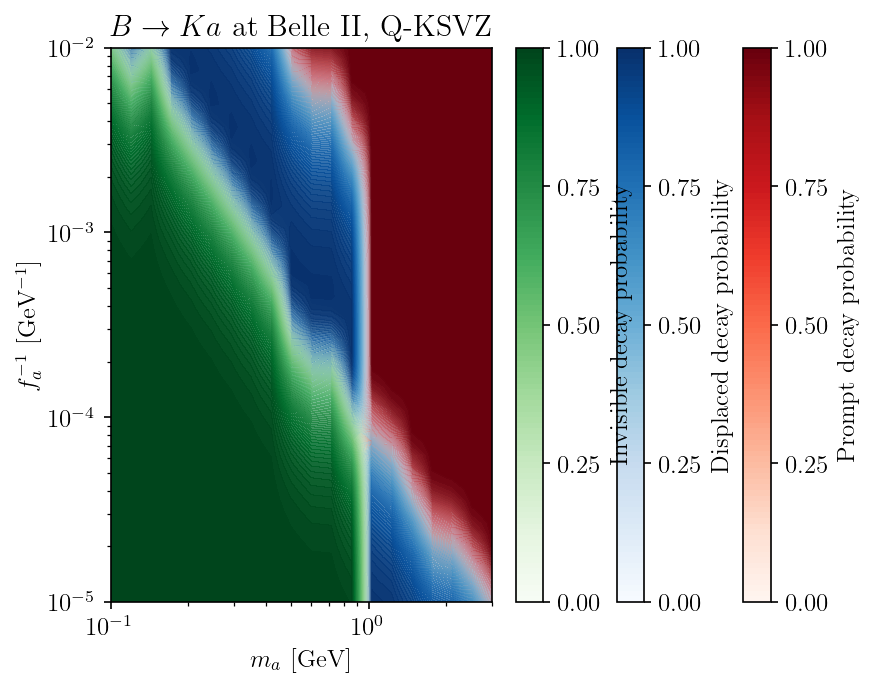

In [12]:
coup = [Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, fa).match_run(5.5, 'VA_below', 'leadinglog', matching_scale=80) for fa in np.logspace(2.0001, 5, 50)]
x_ma, y_coup = np.meshgrid(ma, coup)
x_ma, y_fa = np.meshgrid(ma, np.logspace(2, 5, 50))
dw = np.vectorize(lambda ma, couplings, fa: total_decay_width(ma, couplings, fa, integrator='no_rge')['DW_tot'])
z_ctau = 1e-7*hbarc_GeVnm/dw(x_ma, y_coup, y_fa)
x_ma, y_fainv = np.meshgrid(ma, 1/np.logspace(2, 5, 50))
prob_prompt = 1-np.exp(-rmin/(z_ctau*gammabeta_alp(x_ma)))
prob_displ = np.exp(-rmin/(z_ctau*gammabeta_alp(x_ma))) - np.exp(-rmax/(z_ctau*gammabeta_alp(x_ma)))
prob_inv = np.exp(-rmax/(z_ctau*gammabeta_alp(x_ma)))
plt.figure(dpi=150)
p1=plt.contourf(x_ma, y_fainv, prob_prompt, levels=np.linspace(0, 1, 100), cmap='Reds', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
p2=plt.contourf(x_ma, y_fainv, prob_displ, levels=np.linspace(0, 1, 100), cmap='Blues', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
p3=plt.contourf(x_ma, y_fainv, prob_inv, levels=np.linspace(0, 1, 100), cmap='Greens', vmin=0, vmax=1, alpha=np.linspace(0, 1, 99))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
cbar1 = plt.colorbar(p1)
cbar1.set_ticks(np.linspace(0, 1, 5))
cbar1.set_label('Prompt decay probability')
cbar2 = plt.colorbar(p2)
cbar2.set_ticks(np.linspace(0, 1, 5))
cbar2.set_label('Displaced decay probability')
cbar3 = plt.colorbar(p3)
cbar3.set_ticks(np.linspace(0, 1, 5))
cbar3.set_label('Invisible decay probability')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$f_a^{-1}$ [GeV$^{-1}$]')
plt.title(r'$B\to Ka$ at Belle II, Q-KSVZ')

In [13]:
from alpaca.decays.alp_decays.branching_ratios import BRsalp

In [18]:
BRsKSVZ=[BRsalp(m, (Q_KSVZ.get_couplings({r'\mathcal{X}': 1}, 4*np.pi*1000).match_run(m, 'VA_below', 'leadinglog', matching_scale=80)),1000) for m in ma]

In [15]:
ma=np.logspace(-1, 1, 1000)

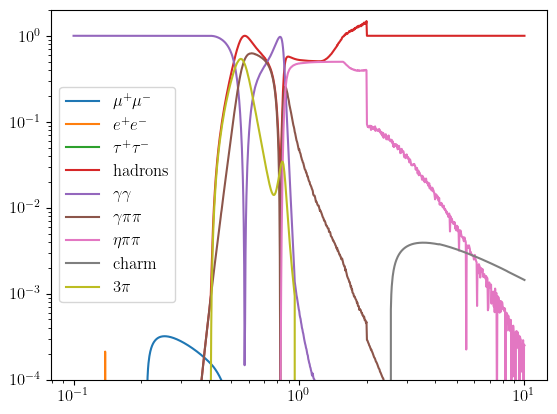

In [19]:
brmu = [i['mu'] for i in BRsKSVZ]
bre= [i['e'] for i in BRsKSVZ]
brtau = [i['tau'] for i in BRsKSVZ]
brhadr= [i['hadrons'] for i in BRsKSVZ]
br2photons = [i['2photons'] for i in BRsKSVZ]
brgammapipi= [i['gammapipi'] for i in BRsKSVZ]
bretapipi= [i['etapipi'] for i in BRsKSVZ]
brcharm = [i['charm'] for i in BRsKSVZ]
br3pis= [i['3pis'] for i in BRsKSVZ]
plt.plot(ma, brmu, label=r'$\mu^+\mu^-$')
plt.plot(ma, bre, label=r'$e^+e^-$')
plt.plot(ma, brtau, label=r'$\tau^+\tau^-$')
plt.plot(ma, brhadr, label=r'hadrons')
plt.plot(ma, br2photons, label=r'$\gamma\gamma$')
plt.plot(ma, brgammapipi, label=r'$\gamma\pi\pi$')
plt.plot(ma, bretapipi, label=r'$\eta\pi\pi$')
plt.plot(ma, brcharm, label=r'charm')
plt.plot(ma, br3pis, label=r'$3\pi$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 2)
plt.legend()

In [199]:
ma

array([0.1       , 0.1023531 , 0.10476158, 0.10722672, 0.10974988,
       0.1123324 , 0.1149757 , 0.1176812 , 0.12045035, 0.12328467,
       0.12618569, 0.12915497, 0.13219411, 0.13530478, 0.13848864,
       0.14174742, 0.14508288, 0.14849683, 0.15199111, 0.15556761,
       0.15922828, 0.16297508, 0.16681005, 0.17073526, 0.17475284,
       0.17886495, 0.18307383, 0.18738174, 0.19179103, 0.19630407,
       0.2009233 , 0.20565123, 0.21049041, 0.21544347, 0.22051307,
       0.22570197, 0.23101297, 0.23644894, 0.24201283, 0.24770764,
       0.25353645, 0.25950242, 0.26560878, 0.27185882, 0.27825594,
       0.28480359, 0.29150531, 0.29836472, 0.30538555, 0.31257158,
       0.31992671, 0.32745492, 0.33516027, 0.34304693, 0.35111917,
       0.35938137, 0.36783798, 0.37649358, 0.38535286, 0.39442061,
       0.40370173, 0.41320124, 0.42292429, 0.43287613, 0.44306215,
       0.45348785, 0.46415888, 0.47508102, 0.48626016, 0.49770236,
       0.5094138 , 0.52140083, 0.53366992, 0.54622772, 0.55908